In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.formula.api import ols

pd.options.mode.chained_assignment = None

suburb = pd.read_csv('../data/raw/suburb_final.csv')
suburb_2023 = pd.read_csv('../data/raw/suburb_2023.csv')
suburb_2024 = pd.read_csv('../data/raw/suburb_2024.csv')
suburb_2025  = pd.read_csv('../data/raw/suburb_2025.csv')



In [2]:
suburb['income'] = suburb['2022_income']
suburb = suburb.fillna(0)
suburb

,Unnamed: 0,LOC_PID,LOC_NAME,rental_price,suburb_population,population_density,offence_count_scaled,2022_income,num_stations,num_schools,Hospital ID,income
0,0,loc0067a4549ed1,Korumburra,278.333333,4897.000000,81.797573,0.168266,47097.371969,0.0,3.0,0.0,47097.371969
1,1,loc00a9769647d7,Kew,621.281250,26158.000000,2486.279947,0.112317,71097.931084,0.0,11.0,6.0,71097.931084
2,2,loc00d1503504f1,Glen Waverley,561.269841,41928.000000,2489.998587,0.109139,44548.852850,2.0,13.0,2.0,44548.852850
3,3,loc00e6e39d335b,Sailors Falls,450.000000,1057.555556,108.121093,0.000946,46234.245242,0.0,0.0,0.0,46234.245242
4,4,loc00f0949ea0ad,Sunbury,471.617647,39266.294118,297.403254,0.138185,62622.919507,1.0,14.0,1.0,62622.919507
...,...,...,...,...,...,...,...,...,...,...,...,...
719,719,locff6258c8ea42,Montmorency,525.555556,9003.705882,2366.881699,0.053311,66315.679359,1.0,4.0,0.0,66315.679359
720,720,locff62fb6a898a,Carrum Downs,458.823529,22420.000000,1109.905643,0.165076,59654.130953,0.0,4.0,0.0,59654.130953
721,721,locffa1c8993b70,Mambourin,407.352941,5488.609375,154.062304,0.021681,59687.062945,0.0,0.0,0.0,59687.062945
722,722,locffb43e78ab10,Murtoa,300.000000,2133.333333,6.995021,0.048281,50199.145749,0.0,2.0,0.0,50199.145749


In [3]:
from sklearn import model_selection
import statsmodels.api as sm

train, test = model_selection.train_test_split(suburb, test_size=0.2, random_state=1234)
model = sm.formula.ols('rental_price ~ population_density + offence_count_scaled + income', data=train).fit()
print('The partial regression coefficients of the models were: \n', model.params)

test_X = test.drop(labels='rental_price', axis=1)
pred = model.predict(exog=test_X)

print('Comparing the difference between predicted and actual values:\n', pd.DataFrame({'Suburb': test.LOC_NAME, 'Prediction': pred, 'Real':test.rental_price}))


The partial regression coefficients of the models were: 
 Intercept               423.016501
population_density       -0.002393
offence_count_scaled   -253.077554
income                    0.002442
dtype: float64
Comparing the difference between predicted and actual values:
             Suburb  Prediction        Real
21        Watsonia  539.880065  446.428571
587  North Bendigo  497.018331  448.913043
271     Allansford  514.714497   40.000000
519  Wheelers Hill  523.656306  591.428571
489     Heidelberg  503.886878  452.516129
..             ...         ...         ...
227         Yinnar  529.817949  380.000000
288     Hughesdale  534.884148  567.500000
214        Donvale  558.765877  570.937500
594   Mirboo North  527.941126  295.000000
319    Melton West  459.307364  358.235294

[145 rows x 3 columns]


In [4]:
accuracy_list = []
for i in pred:
    for j in test.rental_price:
        if i > j:
            accuracy_list.append(j/i)
        else:
            accuracy_list.append(i/j)
            
accuracy = sum(accuracy_list) / len(accuracy_list)

print('Accuracy of this model is:\n', accuracy)

Accuracy of this model is:
 0.8019375358290044


In [5]:
suburb['num_hospital'] = suburb['Hospital ID']

In [6]:
train, test = model_selection.train_test_split(suburb, test_size=0.2, random_state=1234)
model_more = sm.formula.ols('rental_price ~ population_density + offence_count_scaled + income + num_stations + num_schools + num_hospital', data=train).fit()
print('The partial regression coefficients of the models were: \n', model_more.params)

test_X = test.drop(labels='rental_price', axis=1)
pred1 = model_more.predict(exog=test_X)

print('Comparing the difference between predicted and actual values:\n', pd.DataFrame({'Suburb': test.LOC_NAME, 'Prediction': pred1, 'Real':test.rental_price}))


The partial regression coefficients of the models were: 
 Intercept               435.523772
population_density       -0.000793
offence_count_scaled   -235.409047
income                    0.002643
num_stations             -5.539650
num_schools             -12.807083
num_hospital             20.188142
dtype: float64
Comparing the difference between predicted and actual values:
             Suburb  Prediction        Real
21        Watsonia  541.337893  446.428571
587  North Bendigo  500.123346  448.913043
271     Allansford  527.359019   40.000000
519  Wheelers Hill  447.999221  591.428571
489     Heidelberg  585.463386  452.516129
..             ...         ...         ...
227         Yinnar  542.159600  380.000000
288     Hughesdale  529.337580  567.500000
214        Donvale  542.505794  570.937500
594   Mirboo North  524.878177  295.000000
319    Melton West  414.420376  358.235294

[145 rows x 3 columns]


In [7]:
accuracy_list1 = []
for i in pred1:
    for j in test.rental_price:
        if i > j:
            accuracy_list1.append(j/i)
        else:
            accuracy_list1.append(i/j)
            
accuracy = sum(accuracy_list1) / len(accuracy_list1)

print('Accuracy of this external model is:\n', accuracy)

Accuracy of this external model is:
 0.7995242096382887


In [8]:
sub_2023 = suburb_2023.drop(labels='rental_price', axis=1)
pred_2023 = model.predict(exog=sub_2023)

print('Prediction of rental price in 2023\n', pd.DataFrame({'Suburb': suburb_2023.LOC_NAME, 'Prediction': pred_2023}))

Prediction of rental price in 2023
             Suburb  Prediction
0       Korumburra  498.275533
1              Kew  566.718162
2    Glen Waverley  499.942462
3    Sailors Falls  539.013490
4          Sunbury  544.771012
..             ...         ...
719    Montmorency  571.044261
720   Carrum Downs  528.821150
721      Mambourin  566.615523
722         Murtoa  537.328962
723        Chelsea  542.423649

[724 rows x 2 columns]


In [9]:
sub_2024 = suburb_2024.drop(labels='rental_price', axis=1)
pred_2024 = model.predict(exog=sub_2024)

print('Prediction of rental price in 2024\n', pd.DataFrame({'Suburb': suburb_2024.LOC_NAME, 'Prediction': pred_2024}))

Prediction of rental price in 2024
             Suburb  Prediction
0       Korumburra  501.357941
1              Kew  571.249636
2    Glen Waverley  501.663945
3    Sailors Falls  542.694195
4          Sunbury  549.383608
..             ...         ...
719    Montmorency  576.418613
720   Carrum Downs  533.494343
721      Mambourin  570.377067
722         Murtoa  541.392188
723        Chelsea  548.710772

[724 rows x 2 columns]


In [10]:
sub_2025 = suburb_2025.drop(labels='rental_price', axis=1)
pred_2025 = model.predict(exog=sub_2025)

print('Prediction of rental price in 2025\n', pd.DataFrame({'Suburb': suburb_2025.LOC_NAME, 'Prediction': pred_2025}))

Prediction of rental price in 2025
             Suburb  Prediction
0       Korumburra  504.520842
1              Kew  575.896422
2    Glen Waverley  503.413374
3    Sailors Falls  546.491194
4          Sunbury  554.131428
..             ...         ...
719    Montmorency  581.965732
720   Carrum Downs  538.312899
721      Mambourin  574.233283
722         Murtoa  545.585877
723        Chelsea  555.230862

[724 rows x 2 columns]


In [11]:
price_pred = pd.DataFrame({'Suburb': suburb.LOC_NAME, 'Rental_price_now': suburb.rental_price,'Prediction_2023': pred_2023, 'Prediction_2024': pred_2024, 'Prediction_2025': pred_2025})

In [12]:
growth_rate_2023 = (price_pred.Prediction_2023 - price_pred.Rental_price_now) / price_pred.Rental_price_now
growth_rate_2024 = (price_pred.Prediction_2024 - price_pred.Prediction_2023) / price_pred.Prediction_2023
growth_rate_2025 = (price_pred.Prediction_2025 - price_pred.Prediction_2024) / price_pred.Prediction_2024
price_pred['avg_growth_rate'] = (growth_rate_2023 + growth_rate_2024 + growth_rate_2025) /3 



In [13]:
price_pred

,Suburb,Rental_price_now,Prediction_2023,Prediction_2024,Prediction_2025,avg_growth_rate
0,Korumburra,278.333333,498.275533,501.357941,504.520842,0.267569
1,Kew,621.281250,566.718162,571.249636,575.896422,-0.023898
2,Glen Waverley,561.269841,499.942462,501.663945,503.413374,-0.034112
3,Sailors Falls,450.000000,539.013490,542.694195,546.491194,0.070544
4,Sunbury,471.617647,544.771012,549.383608,554.131428,0.057407
...,...,...,...,...,...,...
719,Montmorency,525.555556,571.044261,576.418613,581.965732,0.035196
720,Carrum Downs,458.823529,528.821150,533.494343,538.312899,0.056809
721,Mambourin,407.352941,566.615523,570.377067,574.233283,0.134790
722,Murtoa,300.000000,537.328962,541.392188,545.585877,0.268802


In [14]:
price_pred.to_csv('../data/raw/Prediction of rental price.csv')

In [15]:
model_sub = sm.formula.ols('rental_price ~ population_density + offence_count_scaled + income + num_stations + num_schools + C(LOC_NAME)', data=suburb).fit()
print('The partial regression coefficients of the models were: \n', model_sub.params)

sub_2023 = suburb_2023.drop(labels='rental_price', axis=1)
sub_2024 = suburb_2024.drop(labels='rental_price', axis=1)
sub_2025 = suburb_2025.drop(labels='rental_price', axis=1)
pre2023 = model_sub.predict(exog=sub_2023)
pre2024 = model_sub.predict(exog=sub_2024)
pre2025 = model_sub.predict(exog=sub_2025)
price_pred_sub = pd.DataFrame({'Suburb': suburb.LOC_NAME, 'Rental_price_now': suburb.rental_price,'Prediction_2023': pre2023, 'Prediction_2024': pre2024, 'Prediction_2025': pre2025})


The partial regression coefficients of the models were: 
 Intercept                      372.364692
C(LOC_NAME)[T.Aberfeldie]      -77.148089
C(LOC_NAME)[T.Aintree]         -88.188075
C(LOC_NAME)[T.Airport West]   -127.155889
C(LOC_NAME)[T.Albanvale]      -149.991356
                                  ...    
population_density               0.003769
offence_count_scaled          -136.850152
income                           0.003201
num_stations                     0.426792
num_schools                     -9.914301
Length: 729, dtype: float64


In [16]:
growth_2023 = (price_pred_sub.Prediction_2023 - price_pred_sub.Rental_price_now) / price_pred_sub.Rental_price_now
growth_2024 = (price_pred_sub.Prediction_2024 - price_pred_sub.Prediction_2023) / price_pred_sub.Prediction_2023
growth_2025 = (price_pred_sub.Prediction_2025 - price_pred_sub.Prediction_2024) / price_pred_sub.Prediction_2024
price_pred_sub['avg_growth_rate'] = (growth_2023 + growth_2024 + growth_2025) /3 

In [17]:
price_pred_sub

,Suburb,Rental_price_now,Prediction_2023,Prediction_2024,Prediction_2025,avg_growth_rate
0,Korumburra,278.333333,282.269943,286.309350,290.454241,0.014310
1,Kew,621.281250,627.072254,633.010621,639.100101,0.009470
2,Glen Waverley,561.269841,563.489776,565.745730,568.038307,0.004004
3,Sailors Falls,450.000000,454.675727,459.499186,464.475044,0.010609
4,Sunbury,471.617647,477.490167,483.534843,489.756724,0.012660
...,...,...,...,...,...,...
719,Montmorency,525.555556,532.379136,539.422071,546.691412,0.013230
720,Carrum Downs,458.823529,464.762870,470.886956,477.201535,0.013177
721,Mambourin,407.352941,412.161317,417.090713,422.144174,0.011960
722,Murtoa,300.000000,305.159093,310.483834,315.979544,0.017449


In [18]:
price_pred_sub.to_csv('../data/raw/Prediction of rental price based on suburbs.csv')

In [19]:
top10_2022 = price_pred_sub.sort_values(['Rental_price_now'],ascending=False).head(10)[['Suburb','Rental_price_now']]
top10_2023 = price_pred_sub.sort_values(['Prediction_2023'],ascending=False).head(10)[['Suburb','Prediction_2023']]
top10_2024 = price_pred_sub.sort_values(['Prediction_2024'],ascending=False).head(10)[['Suburb','Prediction_2024']]
top10_2025 = price_pred_sub.sort_values(['Prediction_2025'],ascending=False).head(10)[['Suburb','Prediction_2025']]
top10_rate = price_pred_sub.sort_values(['avg_growth_rate'],ascending=False).head(10)

In [20]:
top10_2022.index = range(1,len(top10_2022) + 1)

In [21]:
top10_2023.index = range(1,len(top10_2023) + 1)

In [22]:
top10_2024.index = range(1,len(top10_2024) + 1)

In [23]:
top10_2025.index = range(1,len(top10_2025) + 1)

In [24]:
top10_rate.index = range(1,len(top10_rate) + 1)

In [25]:
Top10 = pd.DataFrame({'Suburbs with highest rental price in 2022': top10_2022.Suburb,
                      'Suburbs with highest rental price in 2023': top10_2023.Suburb,
                      'Suburbs with highest rental price in 2024': top10_2024.Suburb, 
                      'Suburbs with highest rental price in 2025': top10_2025.Suburb,
                      'highest rental price in 2025': top10_2025.Prediction_2025,
                      'Suburbs with highest average growth rate': top10_rate.Suburb,
                      'Price of top10 suburbs with highest average growth rate in 2025': top10_rate.Prediction_2025,})

In [26]:
Top10

,Suburbs with highest rental price in 2022,Suburbs with highest rental price in 2023,Suburbs with highest rental price in 2024,Suburbs with highest rental price in 2025,highest rental price in 2025,Suburbs with highest average growth rate,Price of top10 suburbs with highest average growth rate in 2025
1,Skenes Creek,Skenes Creek,Skenes Creek,Skenes Creek,3859.211800,Allansford,52.540933
2,Merriang,Merriang,Merriang,Merriang,2812.698970,Kadnook,261.320428
3,Flinders,Flinders,Flinders,Flinders,2439.804840,Natimuk,223.179011
4,Seaspray,Seaspray,Seaspray,Seaspray,2261.059623,Nichols Point,216.579411
5,Marengo,Marengo,Marengo,Marengo,2109.211800,Bundalong,193.904514
6,Balnarring Beach,Balnarring Beach,Balnarring Beach,Balnarring Beach,2011.732067,Nhill,275.294776
7,Myrtleford,Myrtleford,Myrtleford,Myrtleford,1801.270399,Pyramid Hill,275.133875
8,Apollo Bay,Apollo Bay,Apollo Bay,Apollo Bay,1666.711800,South Kingsville,408.758589
9,Indented Head,Indented Head,Indented Head,Indented Head,1602.648823,Penshurst,249.314142
10,Cape Bridgewater,Cape Bridgewater,Cape Bridgewater,Cape Bridgewater,1556.705348,Boort,326.800542


In [27]:
Top10.to_csv('../data/raw/rank of suburbs and growth rate.csv')

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           rental_price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.623
Date:                Thu, 06 Oct 2022   Prob (F-statistic):             0.0130
Time:                        00:56:38   Log-Likelihood:                -4103.2
No. Observations:                 579   AIC:                             8214.
Df Residuals:                     575   BIC:                             8232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              423.0165     80.589      5.249      0.000     264.732     581.301
population_density      -0.0024      0.007     -0.336      0.737      -0.016       0.012
offence_count_scaled  -253.0776     89.584     -2.825      0.005    -429.029     -77.126
income                   0.0024      0.001      1.677      0.094      -0.000       0.005
==============================================================================
Omnibus:                      674.230   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52415.788
Skew:                           5.577   Prob(JB):                         0.00
Kurtosis:                      48.258   Cond. No.                     4.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model_more.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           rental_price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.049
Date:                Thu, 06 Oct 2022   Prob (F-statistic):            0.00607
Time:                        00:56:38   Log-Likelihood:                -4099.5
No. Observations:                 579   AIC:                             8213.
Df Residuals:                     572   BIC:                             8244.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              435.5238     82.673      5.268      0.000     273.144     597.903
population_density      -0.0008      0.007     -0.108      0.914      -0.015       0.014
offence_count_scaled  -235.4090     91.687     -2.568      0.010    -415.494     -55.324
income                   0.0026      0.001      1.773      0.077      -0.000       0.006
num_stations            -5.5397     19.982     -0.277      0.782     -44.787      33.708
num_schools            -12.8071      5.311     -2.411      0.016     -23.239      -2.375
num_hospital            20.1881     15.575      1.296      0.195     -10.404      50.780
==============================================================================
Omnibus:                      669.609   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51604.659
Skew:                           5.511   Prob(JB):                         0.00
Kurtosis:                      47.917   Cond. No.                     4.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


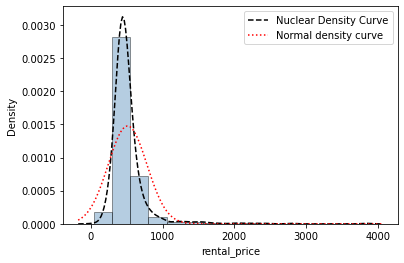

In [34]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.distplot(a=suburb.rental_price, bins=15, fit=stats.norm, norm_hist=True,
             hist_kws={'color':'steelblue', 'edgecolor':'black'},
             kde_kws={'color':'black', 'linestyle':'--', 'label':'Nuclear Density Curve'},
             fit_kws={'color':'red', 'linestyle':':', 'label':'Normal density curve'})

plt.legend()

plt.show()

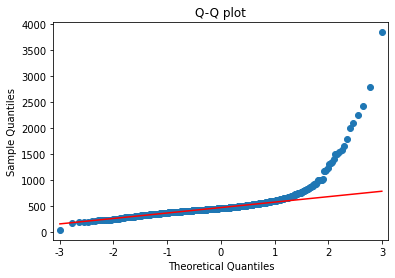

In [37]:
import statsmodels.api as sm

pp_qq_plot = sm.ProbPlot(suburb.rental_price)


pp_qq_plot.qqplot(line='q')
plt.title('Q-Q plot')


plt.show()


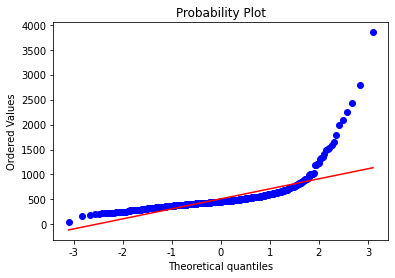

In [38]:
from scipy import stats

plt.rcParams['axes.unicode_minus'] = False

stats.probplot(suburb.rental_price, dist=stats.norm, sparams=(0,1), plot=plt)
plt.show()


In [39]:
import scipy.stats as stats

Shapiro_test = stats.shapiro(suburb.rental_price)
print(Shapiro_test)

ShapiroResult(statistic=0.5534712076187134, pvalue=2.6595551840082855e-39)


In [41]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(suburb.loc[:,['population_density' , 'offence_count_scaled' , 'income',  'num_stations' , 'num_schools','num_hospital']])

vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF Faxtor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


               features  VIF Faxtor
0                 const   49.244296
1    population_density    1.272901
2  offence_count_scaled    1.061638
3                income    1.244803
4          num_stations    1.440025
5           num_schools    1.426550
6          num_hospital    1.342956
